References:
- https://www.youtube.com/watch?v=VMj-3S1tku0

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Derivatives

In [2]:
# mathematical function which takes a scalar value x
def f(x):
  """
  x -- floating number

  f(x) = 3x^2 - 4x + 5
  """
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

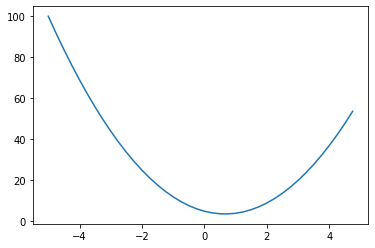

In [4]:
# Plot the function f(x)
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
"""
Understanding derivatives
"""

'\nUnderstanding derivatives\n'

In [6]:
# take a very small h
h = 0.000001

# where we're evaluating the function
x = 2/3 # at 2/3, slope is approximately zero

# definition of a derivative
# rise over run
(f(x + h) - f(x))/h

2.999378523327323e-06

## Derivatives (More Complex)

In [7]:
# let's get more complex
a = 2.0
b = -3.0
c = 10.0

# three inputs into our expression graph and a single output d
d = a*b + c
print(d)

4.0


In [8]:
# I'd like to again look at the derivatives of d with respect to a b and c
h = 0.0001

# three inputs into our expression graph and a single output d
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c

# change below to either a +=, b += or c+= to see how it affects d
c += h

d2 = a*b + c

print('d1:', d1)
print('d2:', d2)

# rise over run
# normalized by h to get the slope
print('slope:', (d2 - d1)/h)

# this gives us the derivative of d with respect to one of the inputs

d1: 4.0
d2: 4.0001
slope: 0.9999999999976694


## Micrograd Core

In [9]:
"""
Support Mathematical Operations
"""

'\nSupport Mathematical Operations\n'

In [10]:
# Initial Value Class
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

a = Value(2.0)
b = Value(2.0)
# a + b

In [11]:
# Implement Add function
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data)
    return out

a = Value(2.0)
b = Value(-3.0)
a + b

Value(data=-1.0)

In [12]:
# Implement Multiply function
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data)
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data)
    return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a * b + c
# (a.__mul__(b)).__add__(c)

Value(data=4.0)

In [13]:
"""
what we are missing is the connective tissue of this expression 
as I mentioned we want to  keep these expression graphs so we need to know and
keep pointers about what values produce what other values
"""

'\nwhat we are missing is the connective tissue of this expression \nas I mentioned we want to  keep these expression graphs so we need to know and\nkeep pointers about what values produce what other values\n'

In [14]:
# Implement self._prev
class Value:
  def __init__(self, data, _children=()):
    self.data = data
    self._prev = set(_children)

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other))
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other))
    return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c

d._prev

{Value(data=-6.0), Value(data=10.0)}

In [15]:
"""
now the last piece of information we don't know so we know that the children of 
every single value but we don't know what operation created this value 
so we need one more element here let's call it underscore pop
"""

"\nnow the last piece of information we don't know so we know that the children of \nevery single value but we don't know what operation created this value \nso we need one more element here let's call it underscore pop\n"

In [16]:
# Implement self._op
class Value:
  def __init__(self, data, _children=(), _op=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c

d._prev, d._op

# so now we not just have d dot pref we also have a
# d dot up and we know that d was produced by an addition of those two values

({Value(data=-6.0), Value(data=10.0)}, '+')

In [17]:
# Add Label
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

In [18]:
"""
Computation Graph
a 
  *  e
b      +  d
     c       *  L
          f
"""

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.lavel = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'l'
L

Value(data=-8.0)

In [19]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), 
             shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

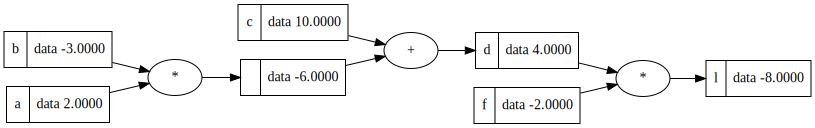

In [20]:
draw_dot(L)

In [21]:
"""
so let's quickly recap what we've done so far we are able to build out 
mathematical expressions using only plus and times so
far they are scalar valued along the way and we can do this forward pass
and build out a mathematical expression so we have 
multiple inputs here a b c and f
going into a mathematical expression that produces a single output l and 
this here is visualizing the forward
pass so the output of the forward pass is negative eight that's the value
"""

"\nso let's quickly recap what we've done so far we are able to build out \nmathematical expressions using only plus and times so\nfar they are scalar valued along the way and we can do this forward pass\nand build out a mathematical expression so we have \nmultiple inputs here a b c and f\ngoing into a mathematical expression that produces a single output l and \nthis here is visualizing the forward\npass so the output of the forward pass is negative eight that's the value\n"

In [22]:
"""
Run Backpropagation
in back propagation we are going to start here at the end and 
we're going to reverse and calculate the gradient along along
all these intermediate values and really what we're computing 
for every single value hereum we're going to compute 
the derivative of that node with respect to l
so the derivative of l with respect to l is just uh one
and then we're going to derive what is the derivative of l with 
respect to f with respect to d with respect to c with
respect to e with respect to b and with respect to a and in the 
neural network setting you'd
be very interested in the derivative of basically 
this loss function l with respect to the weights of a neural
network and here of course we have just 
these variables a b c and f but some of these will eventually
represent the weights of a neural net and 
so we'll need to know how those weights are impacting
the loss function so we'll be interested 
basically in the derivative of the output with respect to some of its leaf
nodes and those leaf nodes will be the weights of the neural net 
and the other leaf nodes of course will be the data itself but usually we will
not want or use the derivative of the loss function 
with respect to data because the data is fixed but the
weights will be iterated on using the gradient information
"""

"\nRun Backpropagation\nin back propagation we are going to start here at the end and \nwe're going to reverse and calculate the gradient along along\nall these intermediate values and really what we're computing \nfor every single value hereum we're going to compute \nthe derivative of that node with respect to l\nso the derivative of l with respect to l is just uh one\nand then we're going to derive what is the derivative of l with \nrespect to f with respect to d with respect to c with\nrespect to e with respect to b and with respect to a and in the \nneural network setting you'd\nbe very interested in the derivative of basically \nthis loss function l with respect to the weights of a neural\nnetwork and here of course we have just \nthese variables a b c and f but some of these will eventually\nrepresent the weights of a neural net and \nso we'll need to know how those weights are impacting\nthe loss function so we'll be interested \nbasically in the derivative of the output with r

In [23]:
"""
What is grad?
so next we are going to create a variable inside
the value class that maintains the derivative of l with respect to that
value and we will call this variable grad
"""

'\nWhat is grad?\nso next we are going to create a variable inside\nthe value class that maintains the derivative of l with respect to that\nvalue and we will call this variable grad\n'

In [24]:
# Add self.grad
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # means no effect
    """
    so at initialization we're assuming that every value does not 
    impact does not affect the 
    output right because if the gradient is zero that means that changing 
    this variable is not changing the loss function
    so by default we assume that the gradient is zero
    """
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.lavel = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'l'
L

Value(data=-8.0)

In [25]:
# Add grad property
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" 
             % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


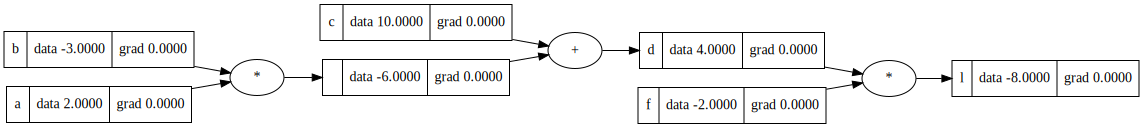

In [26]:
draw_dot(L)

In [27]:
"""
What is grad?

this grad again as I mentioned is representing the derivative of the output 
in this case l with respect to this value so
with respect to so this is the derivative of l with respect to f 
with respect to d
"""

'\nWhat is grad?\n\nthis grad again as I mentioned is representing the derivative of the output \nin this case l with respect to this value so\nwith respect to so this is the derivative of l with respect to f \nwith respect to d\n'

## Manual Backpropagation (Example 1)

In [28]:
"""
let's now fill
in those gradients and actually do back propagation manually
"""

"\nlet's now fill\nin those gradients and actually do back propagation manually\n"

In [29]:
"""
so what is the derivative
of l with respect to l in other words if i change l by a tiny amount of h
how much does l change it changes by h so it's proportional and
therefore derivative will be one

we can of course measure these or estimate these numerical gradients
numerically just like we've seen before
"""

"\nso what is the derivative\nof l with respect to l in other words if i change l by a tiny amount of h\nhow much does l change it changes by h so it's proportional and\ntherefore derivative will be one\n\nwe can of course measure these or estimate these numerical gradients\nnumerically just like we've seen before\n"

In [30]:
"""
Computation Graph
a 
  *  e
b      +  d
     c       *  L
          f

dL/dL = 1

L = d * f
dL/dd = f = -2
dL/df = d = 4

d = e + c
dL/de = (dL/dd) * (dd/de) = f * 1 = -2
dL/dc = (dL/dd) * (dd/dc) = f * 1 = -2

e = a * b
dL/da = (dL/dd) * (dd/de) * (de/da) = -2 * b
dL/db = (dL/dd) * (dd/de) * (de/db) = -2 * a
"""

'\nComputation Graph\na \n  *  e\nb      +  d\n     c       *  L\n          f\n\ndL/dL = 1\n\nL = d * f\ndL/dd = f = -2\ndL/df = d = 4\n\nd = e + c\ndL/de = (dL/dd) * (dd/de) = f * 1 = -2\ndL/dc = (dL/dd) * (dd/dc) = f * 1 = -2\n\ne = a * b\ndL/da = (dL/dd) * (dd/de) * (de/da) = -2 * b\ndL/db = (dL/dd) * (dd/de) * (de/db) = -2 * a\n'

In [31]:
# Example of calculating partial derivative
def lol():
  """
  This will print the derivative of L wrt to a
  because a is the one that we bumped a little bit by h
  """

  # small amount h
  h = 0.0001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  L1 = L.data

  # adding this to a
  a = Value(2.0 + h, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  L2 = L.data

  # rise over run
  print((L2 - L1)/h)

lol()

6.000000000021544


In [32]:
# Example of calculating partial derivative
def lol():
  """
  This will print the derivative of L wrt to L
  because L is the one that we bumped a little bit by h
  """

  # small amount h
  h = 0.0001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  # adding h to L
  L2 = L.data + h

  # rise over run
  print((L2 - L1)/h)

lol()

0.9999999999976694


In [33]:
# Let's do manual back propagation

In [34]:
L.grad = 1

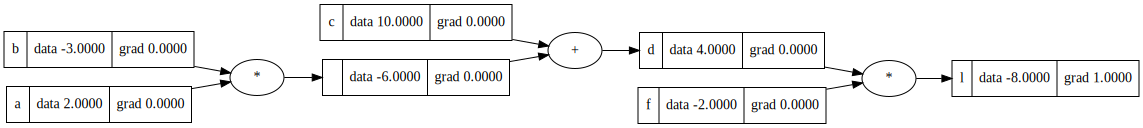

In [35]:
draw_dot(L)

In [36]:
# Let's do d first

In [37]:
"""
L = d * f

dL/dd = f

Proof

(f(x+h) - f(x)) / h

((d+h)*f - d*f) / h
(d*f + h*f -d*f) / h
(h*f) / h
f
"""

'\nL = d * f\n\ndL/dd = f\n\nProof\n\n(f(x+h) - f(x)) / h\n\n((d+h)*f - d*f) / h\n(d*f + h*f -d*f) / h\n(h*f) / h\nf\n'

In [38]:
f.grad = 4.0
d.grad = -2.0

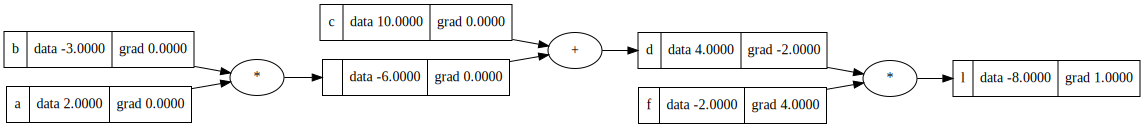

In [39]:
draw_dot(L)

In [40]:
# Example of calculating partial derivative
def lol():
  """
  This will print the derivative of L wrt to L
  because L is the one that we bumped a little bit by h
  """

  # small amount h
  h = 0.0001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  d.data += h
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  # adding h to L
  L2 = L.data

  # rise over run
  print((L2 - L1)/h)

lol()

-1.9999999999953388


In [41]:
"""
what we're doing here is what kind of like an
inline gradient check gradient check is when we are deriving this like 
back propagation
and getting the derivative with respect to all the intermediate results and 
then numerical gradient is just you know
estimating it using small step size 

now we're getting to the crux of backpropagation

so this will be the most
important node to understand because if you understand the gradient for 
this node you understand all of back
propagation and all of training of neural nets
"""

"\nwhat we're doing here is what kind of like an\ninline gradient check gradient check is when we are deriving this like \nback propagation\nand getting the derivative with respect to all the intermediate results and \nthen numerical gradient is just you know\nestimating it using small step size \n\nnow we're getting to the crux of backpropagation\n\nso this will be the most\nimportant node to understand because if you understand the gradient for \nthis node you understand all of back\npropagation and all of training of neural nets\n"

In [42]:
"""
basically so we need to derive dl by dc
in other words the derivative of l with respect to c because we've computed 
all these other gradients already
now we're coming here and we're continuing the back propagation manually 
so we want dl by dc and then we'll also
derive dl by de now here's the problem how do we derive dl
by dc we actually know the derivative l with respect to d so we know 
how l assessed
it to d but how is l sensitive to c so if we wiggle c how does that impact l
through d so we know dl by dc
and we also here know how c impacts d and so just very intuitively 
if you know the impact that c is having on d and the
impact that d is having on l then you should be able to somehow 
put that information together to figure out
how c impacts l and indeed this is what we can actually do 
so in particular we know just
concentrating on d first let's look at how what is the 
derivative basically of d with respect to c so in other words
"""

"\nbasically so we need to derive dl by dc\nin other words the derivative of l with respect to c because we've computed \nall these other gradients already\nnow we're coming here and we're continuing the back propagation manually \nso we want dl by dc and then we'll also\nderive dl by de now here's the problem how do we derive dl\nby dc we actually know the derivative l with respect to d so we know \nhow l assessed\nit to d but how is l sensitive to c so if we wiggle c how does that impact l\nthrough d so we know dl by dc\nand we also here know how c impacts d and so just very intuitively \nif you know the impact that c is having on d and the\nimpact that d is having on l then you should be able to somehow \nput that information together to figure out\nhow c impacts l and indeed this is what we can actually do \nso in particular we know just\nconcentrating on d first let's look at how what is the \nderivative basically of d with respect to c so in other words\n"

In [43]:
"""

Derivative of d wrt c
dd / dc     should be 1.0
By symmetry
dd / de     will also be 1.0

d = c + e

(f(x+h) - f(x)) / h


((c+h + e) - (c+e)) / h
everything cancels and we're left with
h / h
1.0


"""

"\n\nDerivative of d wrt c\ndd / dc     should be 1.0\nBy symmetry\ndd / de     will also be 1.0\n\nd = c + e\n\n(f(x+h) - f(x)) / h\n\n\n((c+h + e) - (c+e)) / h\neverything cancels and we're left with\nh / h\n1.0\n\n\n"

In [44]:
"""
this is the local derivative so i call this the local derivative because 
we have the
final output value all the way at the end of this graph and we're now 
like a small node here and this is a little plus node
and it the little plus node doesn't know anything about the rest of the 
graph that it's embedded in all it knows is
that it did a plus it took a c and an e added them and created d and 
this plus note also knows the local
influence of c on d or rather rather the derivative of d 
with respect to c and it
also knows the derivative of d with respect to e but that's not 
what we want that's just a local derivative what we actually
want is d l by d c and l could l is here just one step away 
but in a general case
this little plus note is could be embedded in like a massive graph so
again we know how l impacts d and now we know how c and e impact d 
how do we put
that information together to write dl by dc

the answer of course is the chain rule in calculus
"""

"\nthis is the local derivative so i call this the local derivative because \nwe have the\nfinal output value all the way at the end of this graph and we're now \nlike a small node here and this is a little plus node\nand it the little plus node doesn't know anything about the rest of the \ngraph that it's embedded in all it knows is\nthat it did a plus it took a c and an e added them and created d and \nthis plus note also knows the local\ninfluence of c on d or rather rather the derivative of d \nwith respect to c and it\nalso knows the derivative of d with respect to e but that's not \nwhat we want that's just a local derivative what we actually\nwant is d l by d c and l could l is here just one step away \nbut in a general case\nthis little plus note is could be embedded in like a massive graph so\nagain we know how l impacts d and now we know how c and e impact d \nhow do we put\nthat information together to write dl by dc\n\nthe answer of course is the chain rule in calculus\n"

In [45]:
"""
d = c + e

dd / dc     should be 1.0
dd / de     will also be 1.0

WANT:
dL / dc

KNOW:
dL / dd
dd / dc

SO by the Chain Rule

dL / dc = (dL / dd) * (dd / dc)

"""

'\nd = c + e\n\ndd / dc     should be 1.0\ndd / de     will also be 1.0\n\nWANT:\ndL / dc\n\nKNOW:\ndL / dd\ndd / dc\n\nSO by the Chain Rule\n\ndL / dc = (dL / dd) * (dd / dc)\n\n'

In [46]:
c.grad = -2.0
e.grad = -2.0

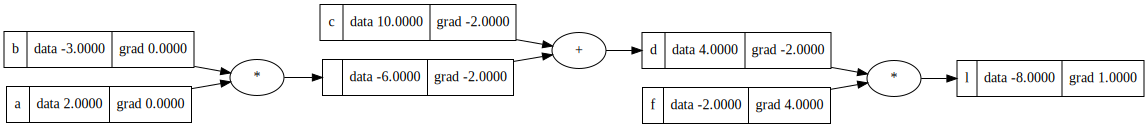

In [47]:
draw_dot(L)

In [48]:
# Example of calculating partial derivative
def lol():
  """
  This will print the derivative of L wrt to L
  because L is the one that we bumped a little bit by h
  """

  # small amount h
  h = 0.0001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  c.data += h
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  # adding h to L
  L2 = L.data

  # rise over run
  print((L2 - L1)/h)

lol()

-1.9999999999953388


In [49]:
"""
We know:

dL / de = -2.0

We want:

dL / da = (dL / de) * (de / da)

e = a * b

de / da = b
de / db = a
"""

'\nWe know:\n\ndL / de = -2.0\n\nWe want:\n\ndL / da = (dL / de) * (de / da)\n\ne = a * b\n\nde / da = b\nde / db = a\n'

In [50]:
# dL/da = dL/de * de/da
a.grad = (-2.0 * -3.0)

# dL/db = dL/de * de/db
b.grad = -2.0 * 2.0

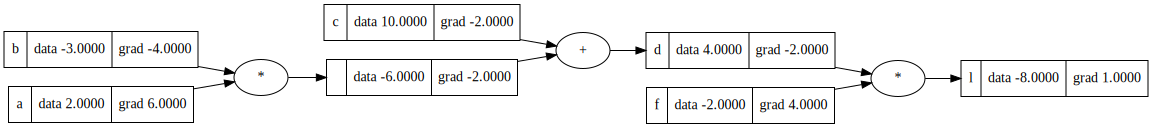

In [51]:
draw_dot(L)

In [52]:
# Example of calculating partial derivative
def lol():
  """
  This will print the derivative of L wrt to L
  because L is the one that we bumped a little bit by h
  """

  # small amount h
  h = 0.0001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a * b; e.lavel = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'l'
  # adding h to L
  L2 = L.data

  # rise over run
  print((L2 - L1)/h)

lol()

-4.000000000008441


In [53]:
"""
Summary

that's it this that was the manual back propagation
uh all the way from here to all the leaf nodes and we've done it piece by piece 
and really all we've done is as you saw
we iterated through all the nodes one by one and locally applied the chain rule 
we always know what is the derivative of
l with respect to this little output and then we look at how this output was 
produced this output was produced
through some operation and we have the pointers to the children nodes of 
this operation
and so in this little operation we know what the local derivatives are and 
we just multiply them onto the derivative
always so we just go through and recursively multiply on the local derivatives 
and

that's what back propagation is is just a recursive application of 
chain rule backwards through the computation graph
"""

"\nSummary\n\nthat's it this that was the manual back propagation\nuh all the way from here to all the leaf nodes and we've done it piece by piece \nand really all we've done is as you saw\nwe iterated through all the nodes one by one and locally applied the chain rule \nwe always know what is the derivative of\nl with respect to this little output and then we look at how this output was \nproduced this output was produced\nthrough some operation and we have the pointers to the children nodes of \nthis operation\nand so in this little operation we know what the local derivatives are and \nwe just multiply them onto the derivative\nalways so we just go through and recursively multiply on the local derivatives \nand\n\nthat's what back propagation is is just a recursive application of \nchain rule backwards through the computation graph\n"

In [54]:
"""
let's see this power in action just very briefly what we're going to do is 
we're going to nudge our inputs to try to make l go up

if we want l to go up that means we just have to go in the direction of the
gradient

if we nudge in direction of the
gradient we expect a positive influence on l so we expect l to go up
"""

"\nlet's see this power in action just very briefly what we're going to do is \nwe're going to nudge our inputs to try to make l go up\n\nif we want l to go up that means we just have to go in the direction of the\ngradient\n\nif we nudge in direction of the\ngradient we expect a positive influence on l so we expect l to go up\n"

In [55]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.lavel = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'l'
L

Value(data=-8.0)

In [56]:
# all should increase in the direction of the gradient
# by small step amount

# leaf nodes
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

# rerun the forward pass
e = a * b
d = e + c
L = d * f

"""
we expect because we nudged all the values all the inputs in the 
direction of gradient we expected a less negative l
"""
print(L.data)

"""
this is basically one step of an
optimization that we'll end up running
"""

-8.0


"\nthis is basically one step of an\noptimization that we'll end up running\n"

## Manual Backpropagation (Example 2 - A Neuron)

In [57]:
"""
More Complex Example

Manual Backpropagation Example #2
"""

'\nMore Complex Example\n\nManual Backpropagation Example #2\n'

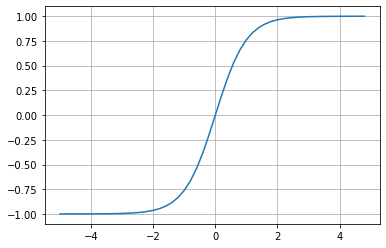

In [58]:
# Example of tanh activation function
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

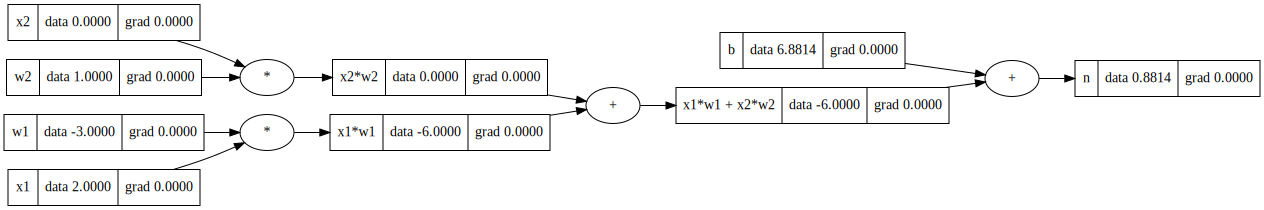

In [59]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

draw_dot(n)

In [60]:
"""
now the reason that we need to implement another tanh function here is that 
tanh is a
hyperbolic function and we've only so far implemented a plus and the times 
and you can't make a tanh out of just pluses
and times you also need exponentiation so tanh is this kind of a formula here
you can use either one of these and you see that 
there's exponentiation involved which we have not implemented yet for
our low value node here so we're not going to be able to produce tanh yet 
and we have to go back up and implement something like it
"""

"\nnow the reason that we need to implement another tanh function here is that \ntanh is a\nhyperbolic function and we've only so far implemented a plus and the times \nand you can't make a tanh out of just pluses\nand times you also need exponentiation so tanh is this kind of a formula here\nyou can use either one of these and you see that \nthere's exponentiation involved which we have not implemented yet for\nour low value node here so we're not going to be able to produce tanh yet \nand we have to go back up and implement something like it\n"

In [61]:
# Implement tanh
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # means no effect
    """
    so at initialization we're assuming that every value does not 
    impact does not affect the out the
    output right because if the gradient is zero that means that changing 
    this variable is not changing the loss function
    so by default we assume that the gradient is zero
    """
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

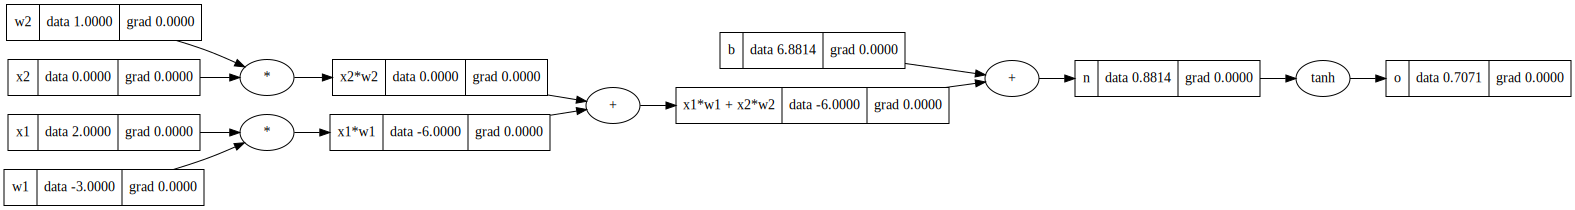

In [62]:
# Include Activation Function

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [63]:
"""
as long as we know the derivative of
10h then we'll be able to back propagate through it
"""

"\nas long as we know the derivative of\n10h then we'll be able to back propagate through it\n"

In [64]:
"""
so now we're going to do back propagation and we're going to fill in 
all the gradients

so what is the derivative o with respect
to all the inputs here 
"""

"\nso now we're going to do back propagation and we're going to fill in \nall the gradients\n\nso what is the derivative o with respect\nto all the inputs here \n"

In [65]:
"""
of course in the typical neural network setting what we really
care about the most is the derivative of these neurons on the weights 
specifically the w2 and w1 because those
are the weights that we're going to be changing part of the optimization 
"""

"\nof course in the typical neural network setting what we really\ncare about the most is the derivative of these neurons on the weights \nspecifically the w2 and w1 because those\nare the weights that we're going to be changing part of the optimization \n"

In [66]:
"""
he other thing that we have to remember is here we have only a single
neuron but in the neural natives typically have many neurons and 
they're connected so this is only like a one small neuron
a piece of a much bigger puzzle and eventually there's a loss function 
that sort of measures the accuracy of the neural net and we're back propagating
with respect to that accuracy and trying to increase it
"""

"\nhe other thing that we have to remember is here we have only a single\nneuron but in the neural natives typically have many neurons and \nthey're connected so this is only like a one small neuron\na piece of a much bigger puzzle and eventually there's a loss function \nthat sort of measures the accuracy of the neural net and we're back propagating\nwith respect to that accuracy and trying to increase it\n"

In [67]:
# Manual Back Propagation

"""
so let's start off by propagation here
in the end what is the derivative of o with respect to o 
the base case sort of we know
always is that the gradient is just 1.0
"""

"\nso let's start off by propagation here\nin the end what is the derivative of o with respect to o \nthe base case sort of we know\nalways is that the gradient is just 1.0\n"

In [68]:
o.grad = 1.0

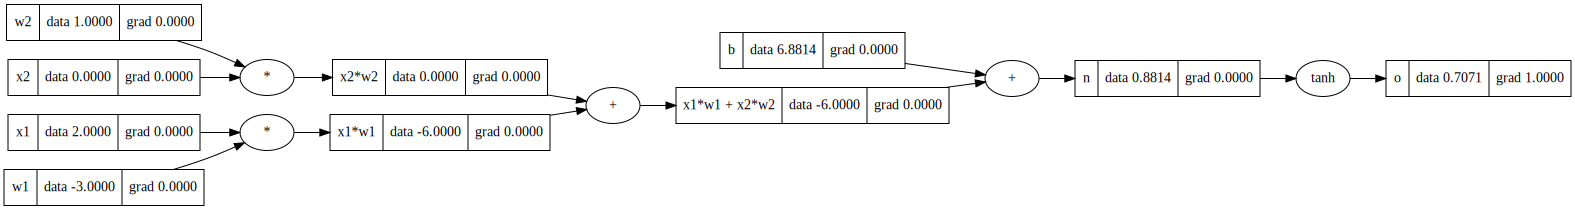

In [69]:
draw_dot(o)

In [70]:
"""
so now we're going to back propagate through the tan h

we need to know the local derivative of tanh

o = tanh(n)

so what is do wrt to n

do/dn = 1 - tanh(n)**2 = 1 - o**2

"""

"\nso now we're going to back propagate through the tan h\n\nwe need to know the local derivative of tanh\n\no = tanh(n)\n\nso what is do wrt to n\n\ndo/dn = 1 - tanh(n)**2 = 1 - o**2\n\n"

In [71]:
1 - o.data**2

# 0.5

0.4999999999999999

In [72]:
n.grad = 0.5

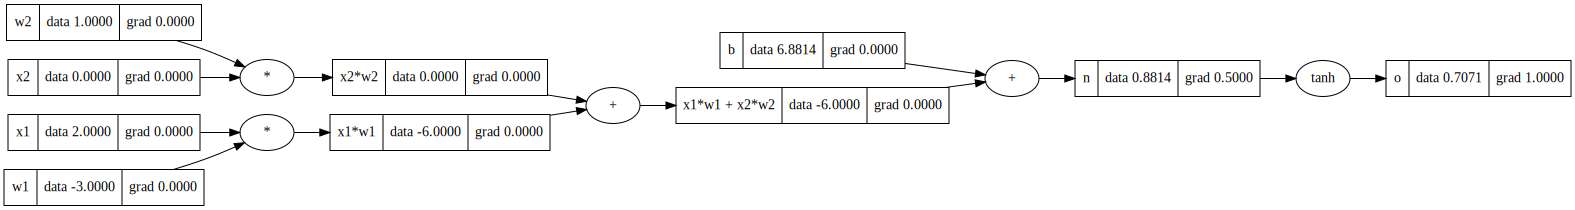

In [73]:
draw_dot(o)

In [74]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

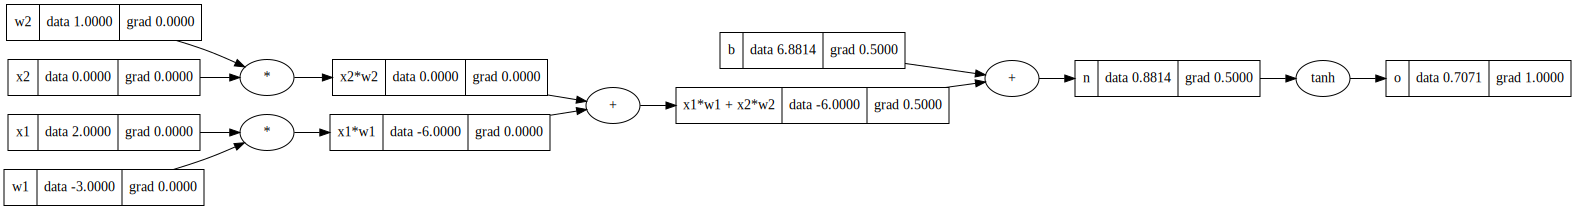

In [75]:
draw_dot(o)

In [76]:
x1w1.grad = 0.5
x2w2.grad = 0.5

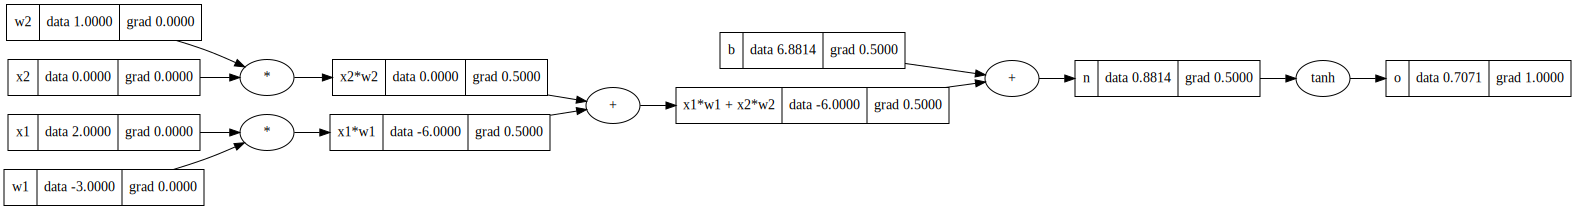

In [77]:
draw_dot(o)

In [78]:
"""
keep in mind what the derivative is telling us at every point in time along
here this is saying that if we want the output of this neuron to increase
then the influence on these expressions is positive on the output 
both of them are positive contribution to the output
"""

'\nkeep in mind what the derivative is telling us at every point in time along\nhere this is saying that if we want the output of this neuron to increase\nthen the influence on these expressions is positive on the output \nboth of them are positive contribution to the output\n'

In [79]:
"""
so now back propagating to x2 and w2 first this is a times node 
so we know that the local derivative is you know the other term 
"""

'\nso now back propagating to x2 and w2 first this is a times node \nso we know that the local derivative is you know the other term \n'

In [80]:
# that's the local piece of chain rule
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

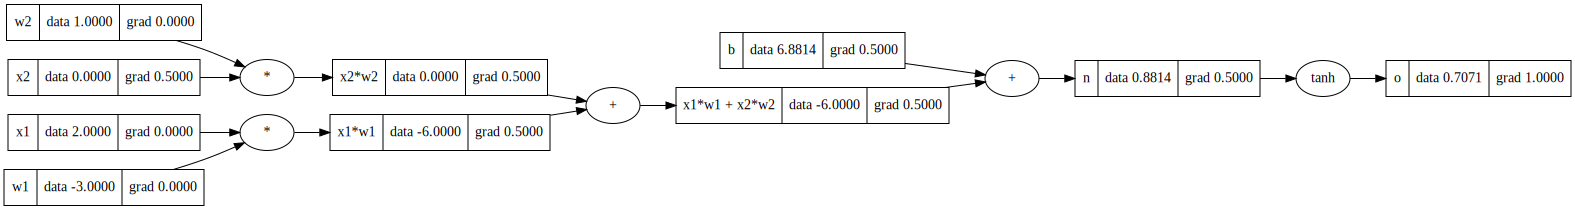

In [81]:
draw_dot(o)

In [82]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

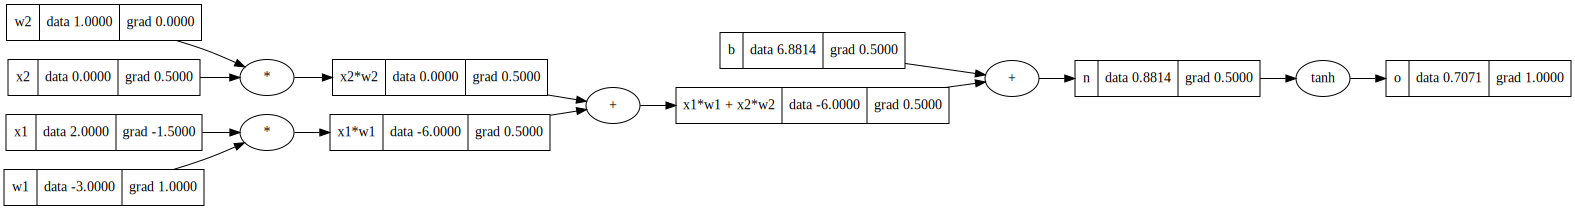

In [83]:
draw_dot(o)

In [84]:
"""
so if we want this neuron's
output to increase we know that what's necessary is that
w2 we have no gradient w2 doesn't actually matter to this neuron right 
now but this neuron this weight should uh go
up so if this weight goes up then this neuron's output would have gone up and
proportionally because the gradient is one
"""

"\nso if we want this neuron's\noutput to increase we know that what's necessary is that\nw2 we have no gradient w2 doesn't actually matter to this neuron right \nnow but this neuron this weight should uh go\nup so if this weight goes up then this neuron's output would have gone up and\nproportionally because the gradient is one\n"

## Implement Backward Function

In [85]:
# Implement Backward Function for each operation
# self._backward
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # means no effect
    """
    so at initialization we're assuming that every value does not 
    impact does not affect the out the
    output right because if the gradient is zero that means that changing 
    this variable is not changing the loss function
    so by default we assume that the gradient is zero
    """
    self._backward = lambda: None
    """
    this will be a function which is going to do that 
    little piece of chain rule at each
    little node that compute that took inputs and produced output 
    uh we're going to store
    how we are going to chain the the outputs gradient into 
    the inputs gradients
    so by default this will be a function that uh doesn't do anything

    this is an empty function and that would be sort of the case 
    for example for a leaf node for leaf node there's nothing to do
    """
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad

    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward
    
    return out

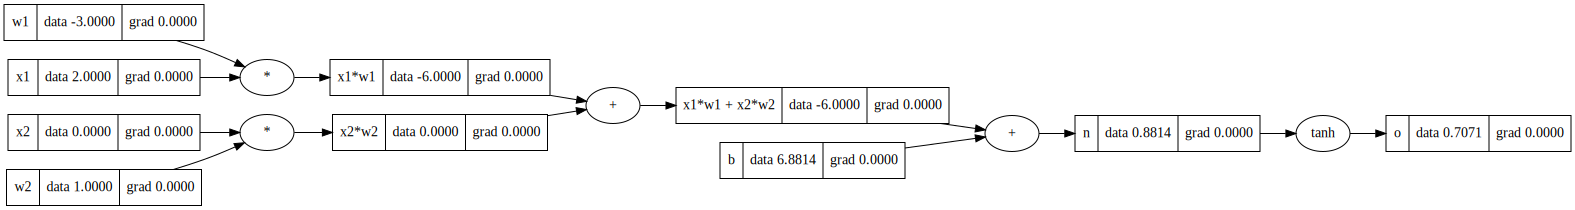

In [86]:
# Include Activation Function

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [87]:
# base case, we need to set o.grad to 1
o.grad = 1.0

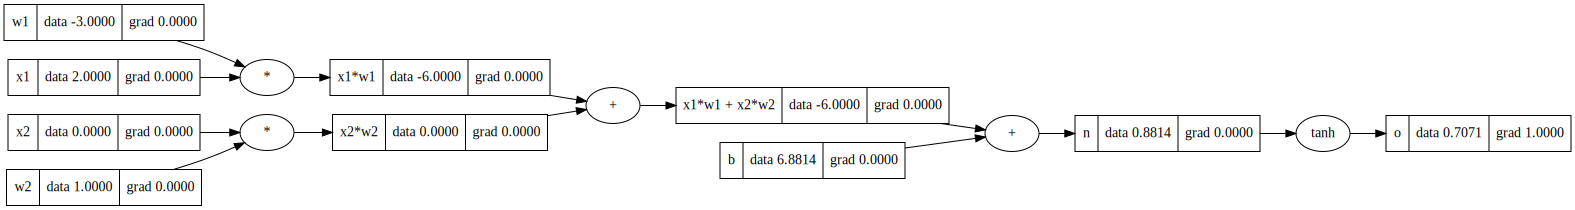

In [88]:
draw_dot(o)

In [89]:
o._backward()

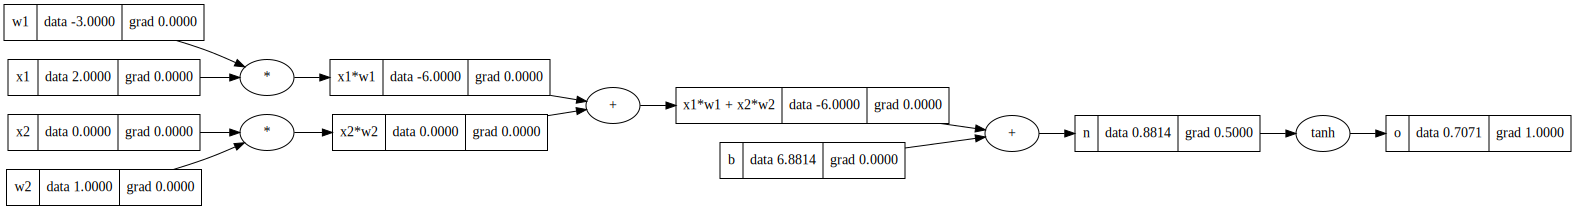

In [90]:
draw_dot(o)

In [91]:
n._backward()

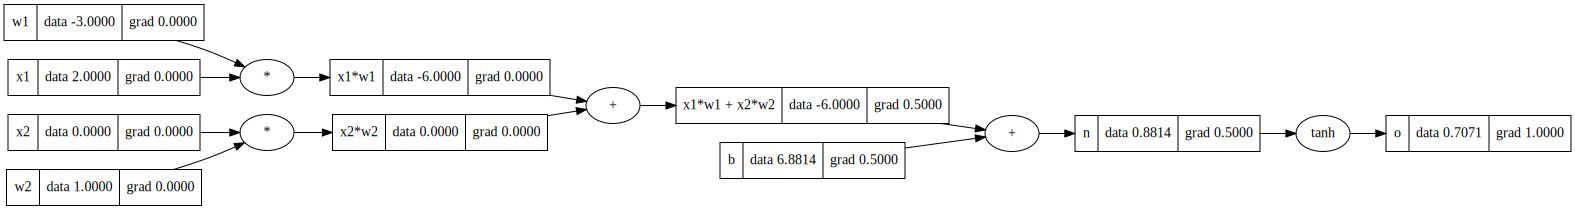

In [92]:
draw_dot(o)

In [93]:
"""
b doesn't have it backward b is backward
because b is a leaf node b's backward is by initialization the empty function
"""
b._backward()

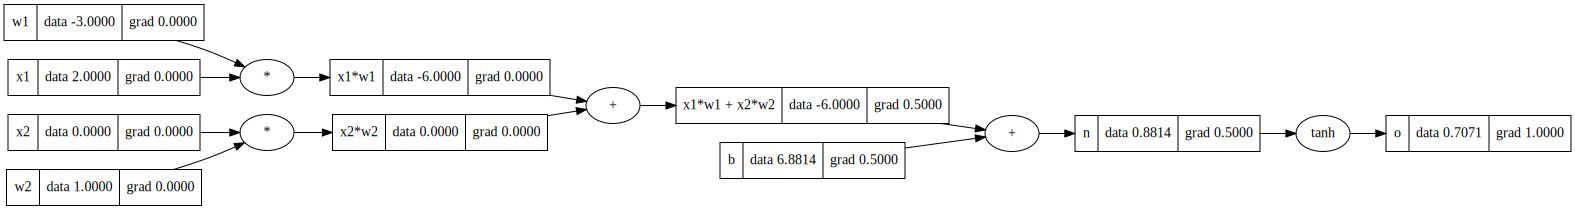

In [94]:
draw_dot(o)

In [95]:
x1w1x2w2._backward()

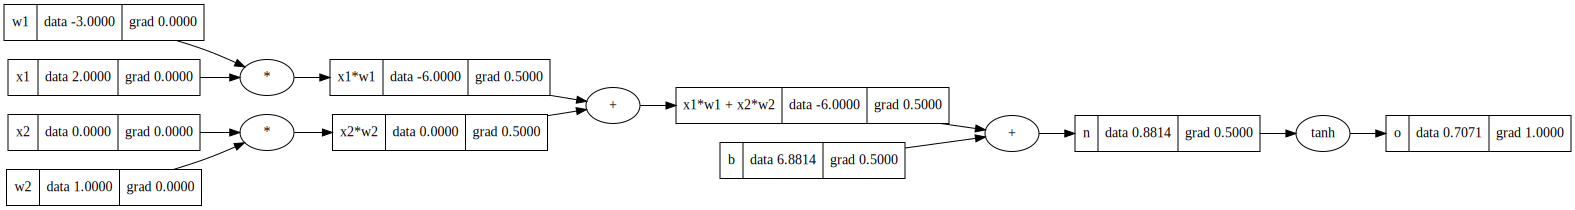

In [96]:
draw_dot(o)

In [97]:
x2w2._backward()
x1w1._backward()

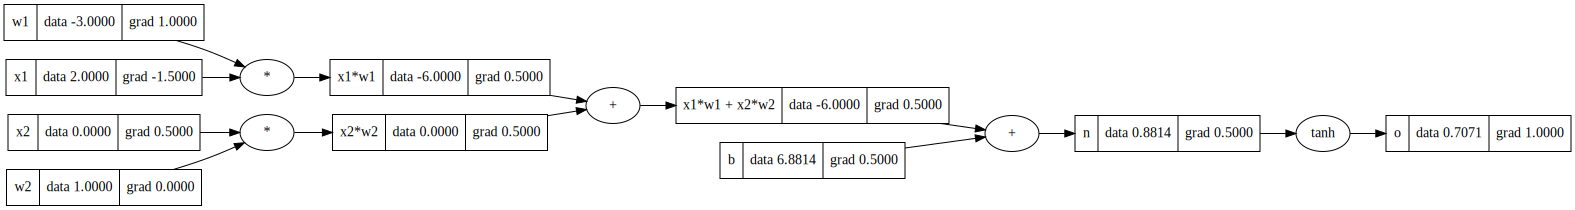

In [98]:
draw_dot(o)

In [99]:
"""
let's think through what we are actually doing um
we've laid out a mathematical expression and now we're trying to go 
backwards through that expression

so going backwards through the expression just means that we never 
want to call a dot backward for any node
before we've done a sort of um everything after it
so we have to do everything after it before we're ever going to call 
that backward on any one node we have to get all of its 
full dependencies everything that it depends on has to propagate 
to it before we can continue back propagation

so this ordering of
graphs can be achieved using something called topological sort
"""

"\nlet's think through what we are actually doing um\nwe've laid out a mathematical expression and now we're trying to go \nbackwards through that expression\n\nso going backwards through the expression just means that we never \nwant to call a dot backward for any node\nbefore we've done a sort of um everything after it\nso we have to do everything after it before we're ever going to call \nthat backward on any one node we have to get all of its \nfull dependencies everything that it depends on has to propagate \nto it before we can continue back propagation\n\nso this ordering of\ngraphs can be achieved using something called topological sort\n"

In [100]:
topo = []
visited = set()

def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)

build_topo(o)

topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

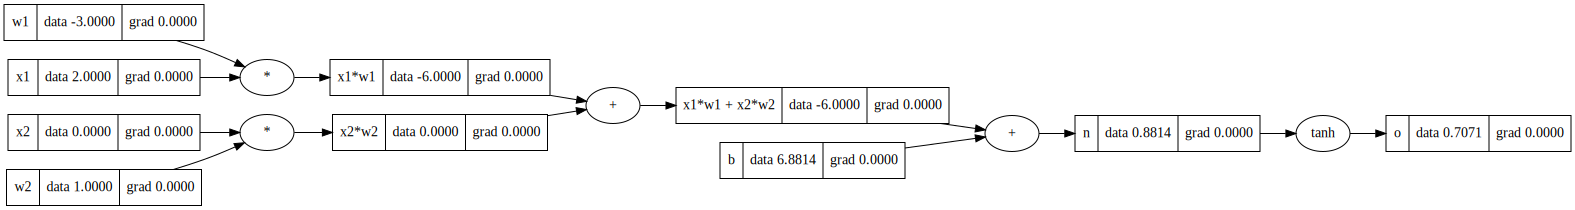

In [101]:
# Reset the gradients

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [102]:
# set base case to zero
o.grad = 1.0

topo = []
visited = set()

def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)

build_topo(o)

for node in reversed(topo):
  node._backward()

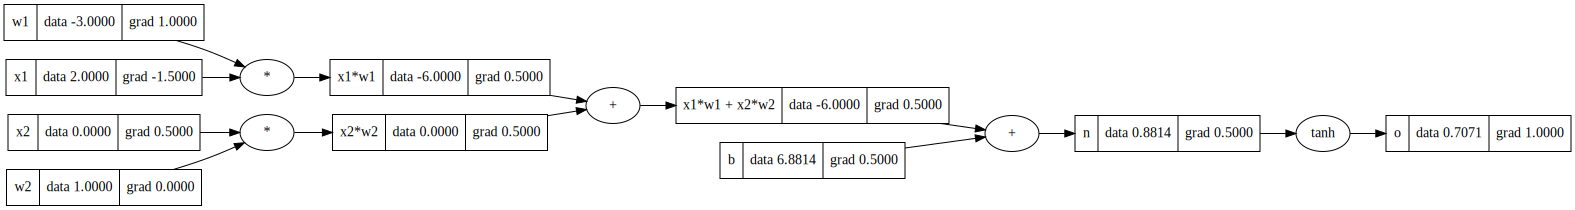

In [103]:
draw_dot(o)

In [104]:
# Implement backward in our Value class

# Implement Backward Function for each operation
# self._backward
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # means no effect
    """
    so at initialization we're assuming that every value does not 
    impact does not affect the out the
    output right because if the gradient is zero that means that changing 
    this variable is not changing the loss function
    so by default we assume that the gradient is zero
    """
    self._backward = lambda: None
    """
    this will be a function which is going to do that 
    little piece of chain rule at each
    little node that compute that took inputs and produced output 
    uh we're going to store
    how we are going to chain the the outputs gradient into 
    the inputs gradients
    so by default this will be a function that uh doesn't do anything

    this is an empty function and that would be sort of the case 
    for example for a leaf node for leaf node there's nothing to do
    """
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad

    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward
    
    return out

  def backward(self):
    topo = []
    visited = set()

    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    build_topo(self)

    self.grad = 1.0
    
    for node in reversed(topo):
      node._backward()

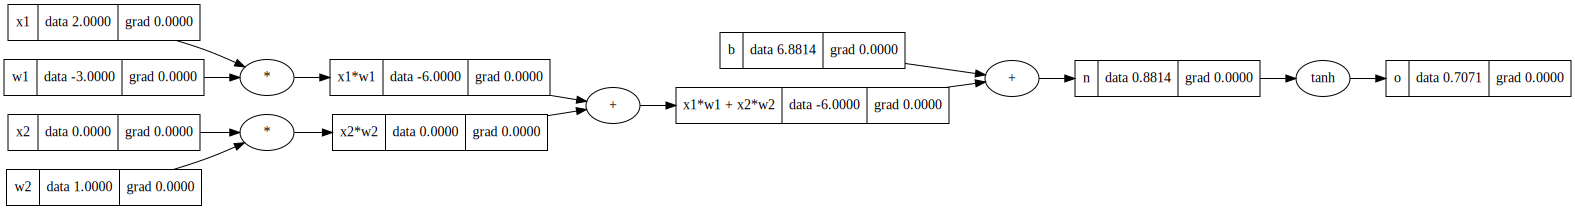

In [105]:
# Reset the gradients

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [106]:
o.backward()

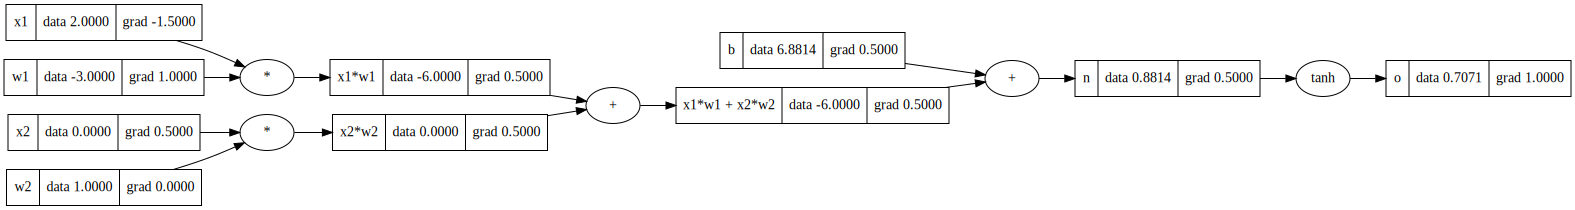

In [107]:
draw_dot(o)

In [108]:
"""
There is a bug, need to fix it

Occurs when one node is used multiple times
"""

'\nThere is a bug, need to fix it\n\nOccurs when one node is used multiple times\n'

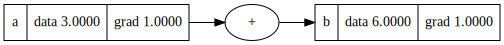

In [109]:
# Example 1
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()

draw_dot(b)

# the derivative of b wrt to a should be 2, not 1

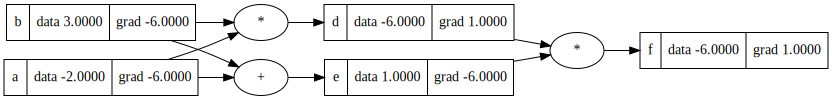

In [110]:
# we're going to see an issue anytime we use a variable more than once

# Example 2
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a * b; d.label = 'd'
e = a + b; e.label = 'e'

f = d * e; f.label = 'f'

f.backward()

draw_dot(f)

In [111]:
"""
the solution here if you look at the multivariate case of the chain rule
and its generalization there the solution there is basically that 
we have to accumulate these gradients these
gradients add and so instead of setting those gradients
we can simply do plus equals we need to accumulate those gradients 
plus equals plus equals
plus equals plus equals
"""

'\nthe solution here if you look at the multivariate case of the chain rule\nand its generalization there the solution there is basically that \nwe have to accumulate these gradients these\ngradients add and so instead of setting those gradients\nwe can simply do plus equals we need to accumulate those gradients \nplus equals plus equals\nplus equals plus equals\n'

In [112]:
# Fix the bug, accumulate the gradients
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # means no effect
    """
    so at initialization we're assuming that every value does not 
    impact does not affect the out the
    output right because if the gradient is zero that means that changing 
    this variable is not changing the loss function
    so by default we assume that the gradient is zero
    """
    self._backward = lambda: None
    """
    this will be a function which is going to do that 
    little piece of chain rule at each
    little node that compute that took inputs and produced output 
    uh we're going to store
    how we are going to chain the the outputs gradient into 
    the inputs gradients
    so by default this will be a function that uh doesn't do anything

    this is an empty function and that would be sort of the case 
    for example for a leaf node for leaf node there's nothing to do
    """
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad

    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out

  def backward(self):
    topo = []
    visited = set()

    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    build_topo(self)

    self.grad = 1.0
    
    for node in reversed(topo):
      node._backward()

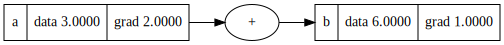

In [113]:
# Example 1
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()

draw_dot(b)

# the derivative of b wrt to a should be 2, not 1

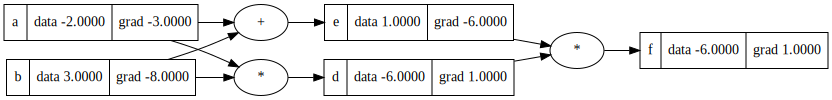

In [114]:
# we're going to see an issue anytime we use a variable more than once

# Example 2
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a * b; d.label = 'd'
e = a + b; e.label = 'e'

f = d * e; f.label = 'f'

f.backward()

draw_dot(f)

In [115]:
"""
Breaking up tanh

we chose to develop tan h as a single function
and we can do that because we know its derivative and we can back propagate 
through it but we can also break down tan h into
and express it as a function of x and i would like to do that now because 
i want to prove to you that you get all the
same results and all those ingredients but also because it forces us to 
implement a few more expressions it
forces us to do exponentiation addition subtraction division and things 
like that and i think it's a good exercise to
go through a few more of these
"""

"\nBreaking up tanh\n\nwe chose to develop tan h as a single function\nand we can do that because we know its derivative and we can back propagate \nthrough it but we can also break down tan h into\nand express it as a function of x and i would like to do that now because \ni want to prove to you that you get all the\nsame results and all those ingredients but also because it forces us to \nimplement a few more expressions it\nforces us to do exponentiation addition subtraction division and things \nlike that and i think it's a good exercise to\ngo through a few more of these\n"

In [116]:
"""
Also does not support something like

a = Value(2.0)
a + 1
"""

'\nAlso does not support something like\n\na = Value(2.0)\na + 1\n'

In [117]:
# Support more operations like above
# and exponent
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # means no effect
    """
    so at initialization we're assuming that every value does not 
    impact does not affect the out the
    output right because if the gradient is zero that means that changing 
    this variable is not changing the loss function
    so by default we assume that the gradient is zero
    """
    self._backward = lambda: None
    """
    this will be a function which is going to do that 
    little piece of chain rule at each
    little node that compute that took inputs and produced output 
    uh we're going to store
    how we are going to chain the the outputs gradient into 
    the inputs gradients
    so by default this will be a function that uh doesn't do anything

    this is an empty function and that would be sort of the case 
    for example for a leaf node for leaf node there's nothing to do
    """
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)

    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad

    out._backward = _backward

    return out

  def __radd__(self, other):
    return self + other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)

    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other):
    return self * other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  def backward(self):
    topo = []
    visited = set()

    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    build_topo(self)

    self.grad = 1.0
    
    for node in reversed(topo):
      node._backward()

In [118]:
a = Value(2.0)

a + 1, 1 + a, a * 1, 1 * a

(Value(data=3.0), Value(data=3.0), Value(data=2.0), Value(data=2.0))

In [119]:
a = Value(2.0)

a.exp()

Value(data=7.38905609893065)

In [120]:
# Implement division

"""
a / b
a * (1/b)
a * (b**-1)

want to be able to do

x**k (it's more general)

for some constant k

want to be able to differentiate this
"""

"\na / b\na * (1/b)\na * (b**-1)\n\nwant to be able to do\n\nx**k (it's more general)\n\nfor some constant k\n\nwant to be able to differentiate this\n"

In [121]:
# Support division, pow and subtract
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0 # means no effect
    """
    so at initialization we're assuming that every value does not 
    impact does not affect the out the
    output right because if the gradient is zero that means that changing 
    this variable is not changing the loss function
    so by default we assume that the gradient is zero
    """
    self._backward = lambda: None
    """
    this will be a function which is going to do that 
    little piece of chain rule at each
    little node that compute that took inputs and produced output 
    uh we're going to store
    how we are going to chain the the outputs gradient into 
    the inputs gradients
    so by default this will be a function that uh doesn't do anything

    this is an empty function and that would be sort of the case 
    for example for a leaf node for leaf node there's nothing to do
    """
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)

    # returning a new Value object data which is the sum
    # of the attribute data
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad

    out._backward = _backward

    return out

  def __radd__(self, other):
    return self + other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)

    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    """
    this function will be called when we try to raise a value 
    to some power and
    other will be that power now i'd like to make sure that 
    other is only an int or a float usually other is
    some kind of a different value object but here other 
    will be forced to be an end or a float otherwise the math
    won't work for for or try to achieve in the specific case 
    that would be a different derivative expression if we wanted other
    to be a value 
    """

    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  def backward(self):
    topo = []
    visited = set()

    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    build_topo(self)

    self.grad = 1.0
    
    for node in reversed(topo):
      node._backward()

In [122]:
a = Value(2.0)
b = Value(4.0)

a / b, a - b

(Value(data=0.5), Value(data=-2.0))

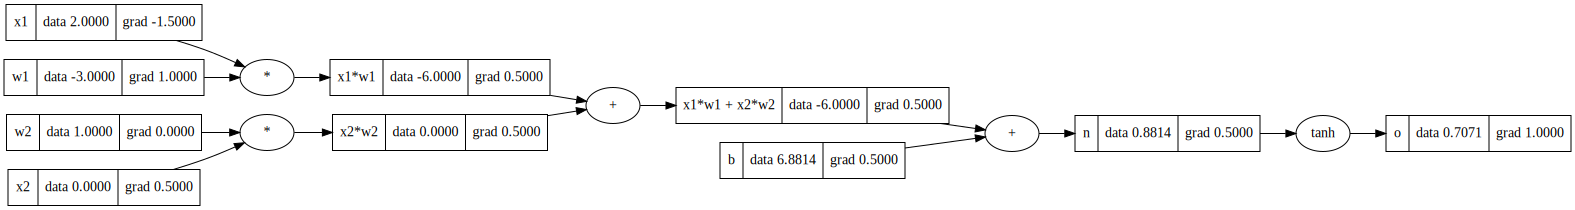

In [123]:
# Reset the gradients

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

# compute the backward pass
o.backward()

draw_dot(o)

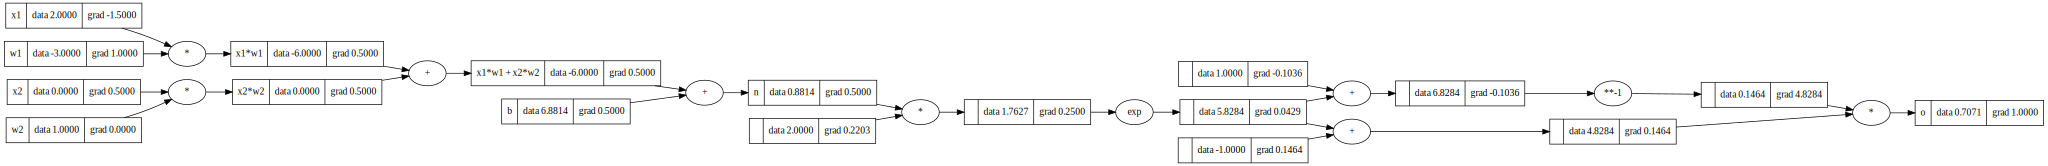

In [124]:
"""
break up tanh
"""

# Reset the gradients

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'
# ----

# compute the backward pass
o.backward()

draw_dot(o)

In [125]:
"""
what do we
expect to see number one we're expecting to see a much longer graph here 
because we've broken up 10h
into a bunch of other operations but those operations 
are mathematically equivalent

so what we're expecting
to see is number one the same result here so the forward pass works and 
number two because of that
mathematical equivalence we expect to see the same backward pass and 
the same gradients on these leaf nodes so these
gradients should be identical
"""

"\nwhat do we\nexpect to see number one we're expecting to see a much longer graph here \nbecause we've broken up 10h\ninto a bunch of other operations but those operations \nare mathematically equivalent\n\nso what we're expecting\nto see is number one the same result here so the forward pass works and \nnumber two because of that\nmathematical equivalence we expect to see the same backward pass and \nthe same gradients on these leaf nodes so these\ngradients should be identical\n"

In [126]:
"""
the reason i wanted to go through
this exercise is number one we got to practice a few more operations and 
uh writing more backwards passes and number
two i wanted to illustrate the point that the um the level at 
which you implement your
operations is totally up to you you can implement backward passes for 
tiny expressions like a single individual
plus or a single times or you can implement them for say tanh
which is a kind of a potentially you can see it as a composite operation 
because it's made up of all these more atomic
operations but really all of this is kind of like a fake concept all that 
matters is we have some kind of inputs
and some kind of an output and this output is a function of the inputs 
in some way and as long as you can do forward pass and the backward pass of
that little operation it doesn't matter what that operation is and 
how composite it is

if you can write the local gradients you can chain the gradient and 
you can continue back propagation so the design
of what those functions are is completely up to you
"""

"\nthe reason i wanted to go through\nthis exercise is number one we got to practice a few more operations and \nuh writing more backwards passes and number\ntwo i wanted to illustrate the point that the um the level at \nwhich you implement your\noperations is totally up to you you can implement backward passes for \ntiny expressions like a single individual\nplus or a single times or you can implement them for say tanh\nwhich is a kind of a potentially you can see it as a composite operation \nbecause it's made up of all these more atomic\noperations but really all of this is kind of like a fake concept all that \nmatters is we have some kind of inputs\nand some kind of an output and this output is a function of the inputs \nin some way and as long as you can do forward pass and the backward pass of\nthat little operation it doesn't matter what that operation is and \nhow composite it is\n\nif you can write the local gradients you can chain the gradient and \nyou can continue back pr

## PyTorch

In [127]:
"""
let's do the same exact thing but using a modern deep learning framework,
pytorch
"""

"\nlet's do the same exact thing but using a modern deep learning framework,\npytorch\n"

In [128]:
import torch

x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('--- Gradients') 
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
--- Gradients
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [129]:
"""
this is going to print the forward pass
"""

'\nthis is going to print the forward pass\n'

In [130]:
o, o.item(), x2.grad.item()

(tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>),
 0.7071066904050358,
 0.5000001283844369)

In [131]:
"""
so basically torches torch can do what we did in micrograd is a special case 
when your
tensors are all single element tensors but the big deal with pytorch is 
that everything is significantly more
efficient because we are working with these tensor objects and we 
can do lots of operations in parallel on all of
these tensors but otherwise what we've built very much agrees 
with the api of pytorch
"""

"\nso basically torches torch can do what we did in micrograd is a special case \nwhen your\ntensors are all single element tensors but the big deal with pytorch is \nthat everything is significantly more\nefficient because we are working with these tensor objects and we \ncan do lots of operations in parallel on all of\nthese tensors but otherwise what we've built very much agrees \nwith the api of pytorch\n"

## Building Out Neural Nets

In [132]:
"""
eventually we'll build out a two-layer multi-layer layer perceptron

i'm going to implement one that also subscribes to the pytorch api in 
how it designs its neural network
modules
"""

"\neventually we'll build out a two-layer multi-layer layer perceptron\n\ni'm going to implement one that also subscribes to the pytorch api in \nhow it designs its neural network\nmodules\n"

In [133]:
class Neuron:
  def __init__(self, nin):
    """
    nin - number of inputs, how many inputs come to a neuron
    """

    # create a weight that is some random number between -1 and 1
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]

    # a bias that controls the overall trigger happiness of this neuron
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b

    # act short for activation
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)

    # pass that to a non-linear activation function
    out = act.tanh()
    return out

"""
next up we're going to define a layer of neurons 

literally a layer is just a list of neurons
"""
class Layer:
  
  def __init__(self, nin, nout):
    """
    nout - number of output neurons in a single layer
    """
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

"""
looks very similar
"""
class MLP:
  
  def __init__(self, nin, nouts):
    """
    nouts - list defines the sizes of all the layers we want in our mlp

    here we just put them all together and then iterate over consecutive pairs
    of these sizes and create layer objects for them
    """
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    """
    calling them sequentially
    """
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

x = [2.0, 3.0]
# we can make a layer of neurons they are two-dimensional neurons
# and let's have three of them
n = Layer(2, 3)
n(x)

# we see that we have three independent evaluations of three different neurons

[Value(data=-0.9973191876443142),
 Value(data=0.9647886023402346),
 Value(data=0.6132875280787934)]

In [134]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.5123270724004687)

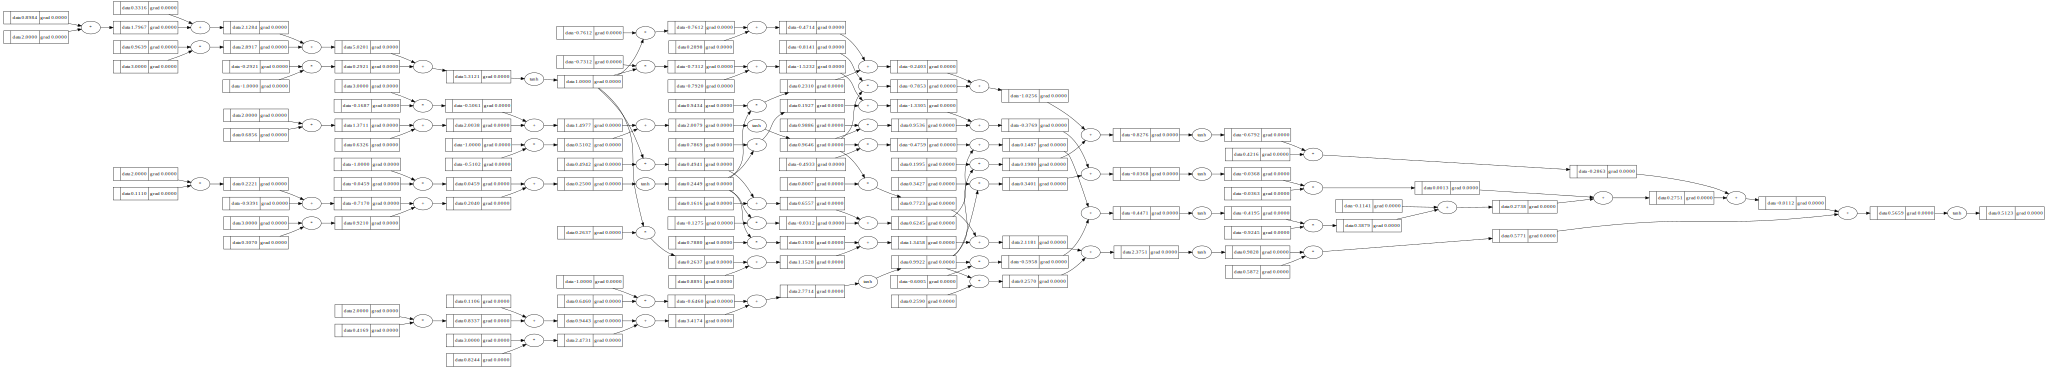

In [135]:
"""
can visualize it
"""

draw_dot(n(x))

## Creating a tiny dataset

In [136]:
"""
let's create ourselves a very simple example data set here
"""

"\nlet's create ourselves a very simple example data set here\n"

In [137]:
"""
so this data set has four examples and so we have four possible inputs 
into the neural net
and we have four desired targets so we'd like the neural net to assign
or output 1.0 when it's fed this example negative one when it's fed 
these examples and one when it's fed this
example so it's a very simple binary classifier neural net 
basically that we would like here
"""
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=0.5123270724004687),
 Value(data=0.20674967760964322),
 Value(data=0.11818822999476122),
 Value(data=0.18255279390393303)]

In [138]:
"""
so how do we make the neural net and how do we tune the weights 
to better predict the desired targets
and the trick used in deep learning to achieve this is 
to calculate a single number that somehow
measures the total performance of your neural net and 
we call this single number the loss
so the loss first is is a single number that we're going 
to define that basically measures how
well the neural net is performing

we're going to implement the mean squared error loss
"""

"\nso how do we make the neural net and how do we tune the weights \nto better predict the desired targets\nand the trick used in deep learning to achieve this is \nto calculate a single number that somehow\nmeasures the total performance of your neural net and \nwe call this single number the loss\nso the loss first is is a single number that we're going \nto define that basically measures how\nwell the neural net is performing\n\nwe're going to implement the mean squared error loss\n"

In [139]:
# mean squared error
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss
"""
so the loss the lowest it can be is zero and 
the greater it is the worse off the neural net is predicting 
"""

'\nso the loss the lowest it can be is zero and \nthe greater it is the worse off the neural net is predicting \n'

In [140]:
loss.backward()

In [141]:
"""
he magical thing of course that happened is that we can look at
end.layers.neuron and that layers at say like the the first layer 
that neurons at zero
because remember that mlp has the layers which is a list and 
each layer has a neurons which is a
list and that gives us an individual neuron and then 
it's got some weights and so we can for example look at the
weights at zero um
oops it's not called weights it's called w and that's a value 
but now this value
also has a groud because of the backward pass and so we see that 
because this gradient
here on this particular weight of this particular neuron of 
this particular layer is negative we see that its influence on the loss is
also negative so slightly increasing this particular weight of 
this neuron of this layer would make the loss go down
"""

n.layers[0].neurons[0].w[0].grad

-0.3477890696678645

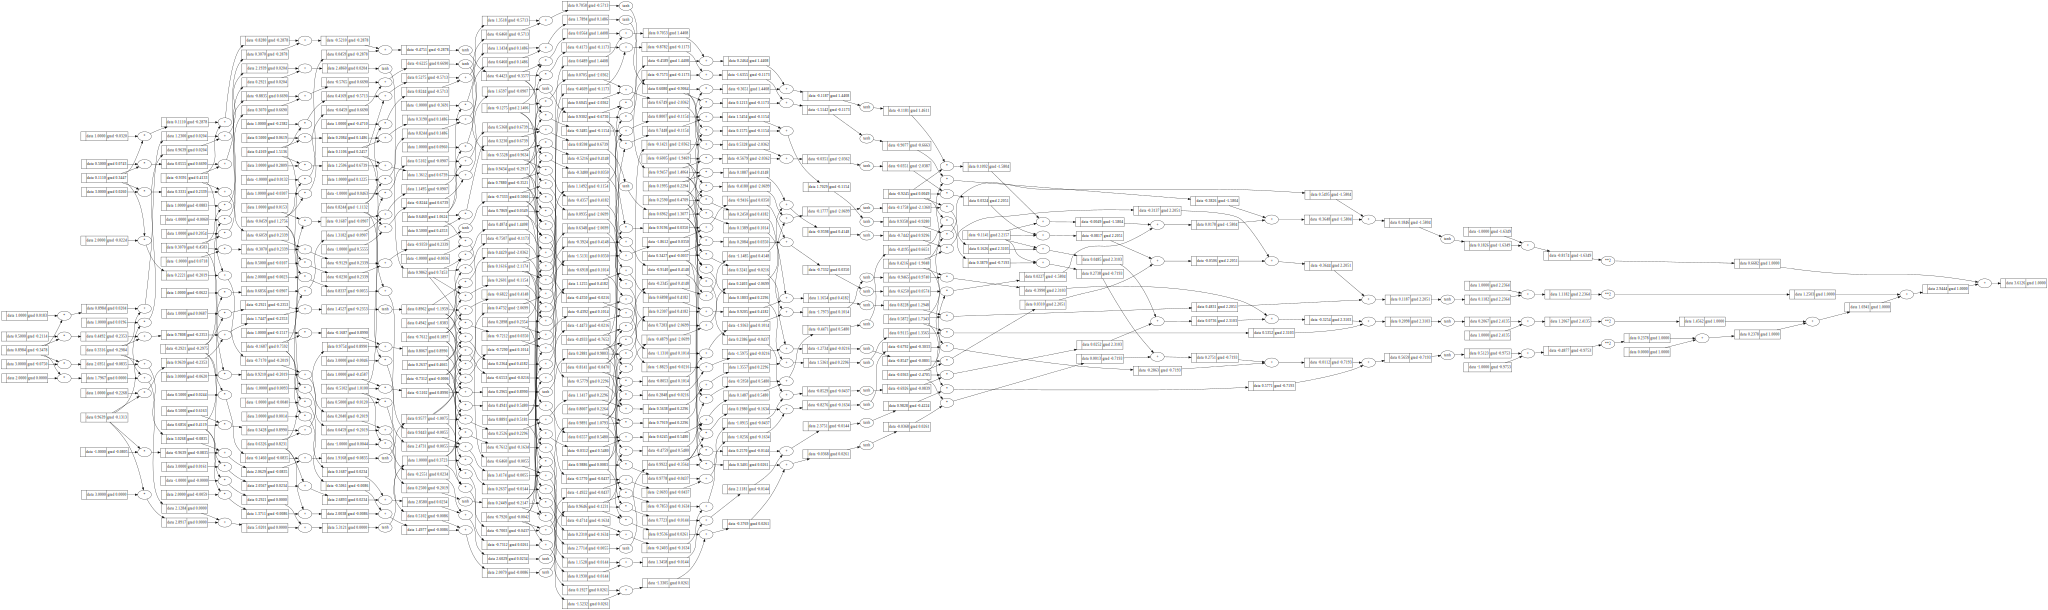

In [142]:
draw_dot(loss)

In [143]:
"""
the thing is these gradients on the
input data are not that useful to us and that's because the input data seems
to be not changeable it's it's a given to the problem and 
so it's a fixed input we're not going to be changing it or
messing with it even though we do have gradients for it

 but some of these gradients here
will be for the neural network parameters the ws and the bs and those 
we of course we want to change
"""

"\nthe thing is these gradients on the\ninput data are not that useful to us and that's because the input data seems\nto be not changeable it's it's a given to the problem and \nso it's a fixed input we're not going to be changing it or\nmessing with it even though we do have gradients for it\n\n but some of these gradients here\nwill be for the neural network parameters the ws and the bs and those \nwe of course we want to change\n"

In [144]:
"""
now we're going to want some convenience code to gather up 
all of the parameters of the neural net so that we
can operate on all of them simultaneously and every one of them 
we will nudge a tiny amount
based on the gradient information
"""

"\nnow we're going to want some convenience code to gather up \nall of the parameters of the neural net so that we\ncan operate on all of them simultaneously and every one of them \nwe will nudge a tiny amount\nbased on the gradient information\n"

In [145]:
class Neuron:
  def __init__(self, nin):
    """
    nin - number of inputs, how many inputs come to a neuron
    """

    # create a weight that is some random number between -1 and 1
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]

    # a bias that controls the overall trigger happiness of this neuron
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b

    # act short for activation
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)

    # pass that to a non-linear activation function
    out = act.tanh()
    return out

  def parameters(self):
    """
    this will just return a list
    list plus list just you know gives you a list so that's parameters 
    of neuron and i'm
    calling it this way because also pi torch has a parameters on 
    every single and in module
    and uh it does exactly what we're doing here
    """
    return self.w + [self.b] # list + list returns a list

"""
next up we're going to define a layer of neurons 

literally a layer is just a list of neurons
"""
class Layer:
  
  def __init__(self, nin, nout):
    """
    nout - number of output neurons in a single layer
    """
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):

    # identical to the return statements
    # params = []
    # for neuron in self.neurons:
    #   ps = neuron.parameters()
    #   params.extend(ps)
    # return params

    return [p for neuron in self.neurons for p in neuron.parameters()]

"""
looks very similar
"""
class MLP:
  
  def __init__(self, nin, nouts):
    """
    nouts - list defines the sizes of all the layers we want in our mlp

    here we just put them all together and then iterate over consecutive pairs
    of these sizes and create layer objects for them
    """
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    """
    calling them sequentially
    """
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [146]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.8151300503965724)

In [147]:
# these are all the weights and biases inside the entire neural net
n.parameters(), len(n.parameters()) # has 41 parameters

([Value(data=-0.8799827151200847),
  Value(data=-0.5985687312204877),
  Value(data=0.8058451421928223),
  Value(data=-0.2221556052249909),
  Value(data=0.8379000126467895),
  Value(data=0.11001595565555533),
  Value(data=0.06045927490831504),
  Value(data=0.5908652861934582),
  Value(data=0.9165466277485743),
  Value(data=-0.7429728112405738),
  Value(data=0.11201675590243187),
  Value(data=-0.8294186804418904),
  Value(data=0.06158111290166168),
  Value(data=0.9726471812244912),
  Value(data=0.5430015007790756),
  Value(data=0.6940835574976316),
  Value(data=-0.16306663756427153),
  Value(data=-0.8467097306628151),
  Value(data=0.8370202449293009),
  Value(data=0.2926580194113202),
  Value(data=0.7272207085456279),
  Value(data=-0.496056512178463),
  Value(data=0.593386908444911),
  Value(data=0.7996701186071284),
  Value(data=0.691331084831073),
  Value(data=0.23804967807841892),
  Value(data=-0.06078466934957971),
  Value(data=0.7464011284492442),
  Value(data=0.4118237791002177),
 

In [148]:
"""
so this data set has four examples and so we have four possible inputs 
into the neural net
and we have four desired targets so we'd like the neural net to assign
or output 1.0 when it's fed this example negative one when it's fed 
these examples and one when it's fed this
example so it's a very simple binary classifier neural net 
basically that we would like here
"""
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.8151300503965724),
 Value(data=-0.2794488735636822),
 Value(data=-0.7420829435747773),
 Value(data=-0.7544422155385259)]

In [149]:
"""
so the loss the lowest it can be is zero and 
the greater it is the worse off the neural net is predicting 
"""
# mean squared error
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss


Value(data=6.958479721320092)

In [150]:
loss.backward()

In [151]:
# this neuron's gradient is slightly negative
# this is its gradient on the loss
n.layers[0].neurons[0].w[0].grad

0.015314905980503047

In [152]:
# neuron's data
n.layers[0].neurons[0].w[0].data

-0.8799827151200847

## Gradient Descent Manually

In [153]:
"""
what we want to do now is we want to
iterate for every p in n dot parameters so for all the 41 parameters 
in this neural net
we actually want to change p data slightly according 
to the gradient information
"""

for p in n.parameters():
  """
  this will be basically a tiny update
  in this gradient descent scheme

  in gradient descent we are thinking of the
  gradient as a vector pointing in the direction of increased
  loss

  in gradient descent we are modifying
  p data by a small step size in the direction of the gradient
  """

  step_size = 0.01 # small step
  p.data += -step_size * p.grad
  """
  a negative sign and again this other interpretation and 
  that's because we want to minimize
  the loss we don't want to maximize the loss we want to decrease it
  """

In [154]:
n.layers[0].neurons[0].w[0].grad, n.layers[0].neurons[0].w[0].data

(0.015314905980503047, -0.8801358641798898)

## This is Gradient Descent

In [155]:
# Forward Pass
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])

"""
low loss means our predictions are matching the targets
"""
loss

Value(data=6.746358802241486)

In [156]:
# Backward Pass
loss.backward()

In [157]:
# Nudge or Update

"""
what we want to do now is we want to
iterate for every p in n dot parameters so for all the 41 parameters 
in this neural net
we actually want to change p data slightly according 
to the gradient information
"""

for p in n.parameters():
  """
  this will be basically a tiny update
  in this gradient descent scheme

  in gradient descent we are thinking of the
  gradient as a vector pointing in the direction of increased
  loss

  in gradient descent we are modifying
  p data by a small step size in the direction of the gradient
  """

  step_size = 0.01 # small step
  p.data += -step_size * p.grad
  """
  a negative sign and again this other interpretation and 
  that's because we want to minimize
  the loss we don't want to maximize the loss we want to decrease it
  """

In [158]:
# values are getting closer to targets
ys, ypred

([1.0, -1.0, -1.0, 1.0],
 [Value(data=-0.781782380643033),
  Value(data=-0.25760108614184885),
  Value(data=-0.7058605563231509),
  Value(data=-0.7128736645319885)])

In [159]:
"""
if you go too fast by the way if you try
to make it too big of a step you may actually overstep

it's overconfidence because again remember we don't actually know exactly 
about the loss function the loss function has all kinds of structure and
we only know about the very local dependence of all these parameters on the loss 
but if we step too far
we may step into you know a part of the loss that is completely different 
and that can destabilize training and
make your loss actually blow up even

Learning Rate
this learning rate and the tuning of it is a subtle art you want 
to set your learning rate if it's too low you're going to
take way too long to converge but if it's too high the whole thing gets unstable 
and you might actually even
explode the loss depending on your loss function so 

finding the step size to be just
right it's it's a pretty subtle art sometimes when you're using sort of 
vanilla gradient descent
but we happen to get into a good spot we can look at n-dot parameters
so this is the setting of weights and biases that makes our network
predict the desired targets very very close

we've successfully trained neural net
"""

"\nif you go too fast by the way if you try\nto make it too big of a step you may actually overstep\n\nit's overconfidence because again remember we don't actually know exactly \nabout the loss function the loss function has all kinds of structure and\nwe only know about the very local dependence of all these parameters on the loss \nbut if we step too far\nwe may step into you know a part of the loss that is completely different \nand that can destabilize training and\nmake your loss actually blow up even\n\nLearning Rate\nthis learning rate and the tuning of it is a subtle art you want \nto set your learning rate if it's too low you're going to\ntake way too long to converge but if it's too high the whole thing gets unstable \nand you might actually even\nexplode the loss depending on your loss function so \n\nfinding the step size to be just\nright it's it's a pretty subtle art sometimes when you're using sort of \nvanilla gradient descent\nbut we happen to get into a good spot we c

In [160]:
"""
let's make this a tiny bit more respectable and implement an actual
training loop
"""

"\nlet's make this a tiny bit more respectable and implement an actual\ntraining loop\n"

In [161]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [162]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0 # zero grad in pytorch
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 6.222276737217548
1 4.135558142288062
2 4.347980284950591
3 4.836234090016022
4 4.905268761727774
5 4.737150632394907
6 4.670165841747272
7 4.393805217052606
8 4.311722730903249
9 3.675750833455392
10 2.7867944114337
11 2.195907601040583
12 1.158650684404392
13 0.12685557960438743
14 0.08005334556617513
15 0.06426872251347326
16 0.05484837429463432
17 0.0481660345207215
18 0.04303227210213424
19 0.03890975542802931


In [163]:
"""
Fixing bug: zero grad on pytorch

working with neural nets is sometimes tricky because uh
you may have lots of bugs in the code and uh your network 
might actually work just like ours worked
but chances are is that if we had a more complex problem 
then actually this bug would have made us not optimize the loss
very well and we were only able to get away with it 
because the problem is very simple
"""

'\nFixing bug: zero grad on pytorch\n\nworking with neural nets is sometimes tricky because uh\nyou may have lots of bugs in the code and uh your network \nmight actually work just like ours worked\nbut chances are is that if we had a more complex problem \nthen actually this bug would have made us not optimize the loss\nvery well and we were only able to get away with it \nbecause the problem is very simple\n'

## Summary

In [164]:
"""
let's now bring everything together and summarize what we learned 

what are neural nets?
neural nets are these mathematical expressions fairly simple 
mathematical expressions in the case of multi-layer perceptron
that take input as the data and they take input the weights and 
the parameters of the neural net mathematical expression for the forward pass 
followed by a loss function

the loss function tries to measure the accuracy of the predictions 
and usually the loss will be low 
when your predictions are matching your
targets or where the network is basically behaving well 

we manipulate the loss function so that when the loss is low, 
the network is doing what you want it to do on your problem

then we backward the loss, use backpropagation to get the gradient and 
then we know how to tune all the parameters to decrease the loss locally 
but then we have to iterate that 
process many times in what's called the gradient descent

we simply follow the gradient information and that minimizes the loss

the loss is arranged so that when the loss is minimized 
the network is doing what you want it to do
"""

"\nlet's now bring everything together and summarize what we learned \n\nwhat are neural nets?\nneural nets are these mathematical expressions fairly simple \nmathematical expressions in the case of multi-layer perceptron\nthat take input as the data and they take input the weights and \nthe parameters of the neural net mathematical expression for the forward pass \nfollowed by a loss function\n\nthe loss function tries to measure the accuracy of the predictions \nand usually the loss will be low \nwhen your predictions are matching your\ntargets or where the network is basically behaving well \n\nwe manipulate the loss function so that when the loss is low, \nthe network is doing what you want it to do on your problem\n\nthen we backward the loss, use backpropagation to get the gradient and \nthen we know how to tune all the parameters to decrease the loss locally \nbut then we have to iterate that \nprocess many times in what's called the gradient descent\n\nwe simply follow the grad

In [165]:
"""
we just have a blob of neural stuff and we can make it do arbitrary things and 
that's what gives
neural nets their power um it's you know this is a very tiny network with 
41 parameters
but you can build significantly more complicated neural nets with billions 
at this point almost trillions of
parameters and it's a massive blob of neural tissue simulated neural tissue
roughly speaking and you can make it do extremely complex problems and 
these neurons then have all
kinds of very fascinating emergent properties in when you try to make them do
significantly hard problems as in the case of gpt for example 
we have massive amounts of text from the
internet and we're trying to get a neural net to predict to take 
like a few words and try to predict the next word
in a sequence that's the learning problem and it turns out that when 
you train this on all of internet the neural net
actually has like really remarkable emergent properties but that neural net 
would have hundreds of billions of parameters
but it works on fundamentally the exact same principles the neural net of course 
will be a bit more complex but otherwise the
value in the gradient is there and would be identical and 
the gradient descent would be there and would be
basically identical but people usually use slightly different updates 
this is a very simple stochastic gradient descent
update um and the loss function would not be mean squared error they 
would be using something called the cross-entropy loss
for predicting the next token so there's a few more details but 
fundamentally the neural network setup and neural network
training is identical and pervasive and now you understand intuitively
how that works under the hood
"""

"\nwe just have a blob of neural stuff and we can make it do arbitrary things and \nthat's what gives\nneural nets their power um it's you know this is a very tiny network with \n41 parameters\nbut you can build significantly more complicated neural nets with billions \nat this point almost trillions of\nparameters and it's a massive blob of neural tissue simulated neural tissue\nroughly speaking and you can make it do extremely complex problems and \nthese neurons then have all\nkinds of very fascinating emergent properties in when you try to make them do\nsignificantly hard problems as in the case of gpt for example \nwe have massive amounts of text from the\ninternet and we're trying to get a neural net to predict to take \nlike a few words and try to predict the next word\nin a sequence that's the learning problem and it turns out that when \nyou train this on all of internet the neural net\nactually has like really remarkable emergent properties but that neural net \nwould have hu

## Dependencies

In [166]:
!pip freeze

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
daft==0.0.4
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.0.